In [1]:
import numpy as np
from numpy import median
import pandas as pd
import re
import itertools

from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

from sklearn.model_selection import GridSearchCV

from sklearn import svm, linear_model
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import AdaBoostRegressor, BaggingRegressor, RandomForestRegressor, ExtraTreesRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor

from sklearn import metrics 
from sklearn.metrics import f1_score
from sklearn.model_selection import cross_val_score

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df1 = pd.read_csv('Admission_Predict.csv', sep='\s*,\s*', header=0, encoding='ascii', engine='python')
df2 = pd.read_csv('Admission_Predict_Ver1.1.csv', sep='\s*,\s*', header=0, encoding='ascii', engine='python')

In [5]:
df2.describe().T

,count,mean,std,min,25%,50%,75%,max
Serial No.,500.0,250.50000,144.481833,1.00,125.7500,250.50,375.25,500.00
GRE Score,500.0,316.47200,11.295148,290.00,308.0000,317.00,325.00,340.00
TOEFL Score,500.0,107.19200,6.081868,92.00,103.0000,107.00,112.00,120.00
University Rating,500.0,3.11400,1.143512,1.00,2.0000,3.00,4.00,5.00
SOP,500.0,3.37400,0.991004,1.00,2.5000,3.50,4.00,5.00
LOR,500.0,3.48400,0.925450,1.00,3.0000,3.50,4.00,5.00
CGPA,500.0,8.57644,0.604813,6.80,8.1275,8.56,9.04,9.92
Research,500.0,0.56000,0.496884,0.00,0.0000,1.00,1.00,1.00
Chance of Admit,500.0,0.72174,0.141140,0.34,0.6300,0.72,0.82,0.97


In [6]:
def get_plt_params():
    params = {'legend.fontsize': 'x-large',
              'figure.figsize' : (18, 8),
              'axes.labelsize' : 'x-large',
              'axes.titlesize' : 'x-large',
              'xtick.labelsize': 'x-large',
              'ytick.labelsize': 'x-large',
              'font.size'      :  10}
    return params

all_columns = ['GRE Score', 'TOEFL Score', 'University Rating', 'SOP', 'LOR', 'CGPA', 'Research', 'Chance of Admit']
columns = ['GRE Score', 'TOEFL Score', 'University Rating', 'SOP', 'LOR', 'CGPA', 'Research']
target = 'Chance of Admit'

In [9]:
df2['CGPA'] = df2['CGPA'].apply(lambda x: ((x/10)*4))

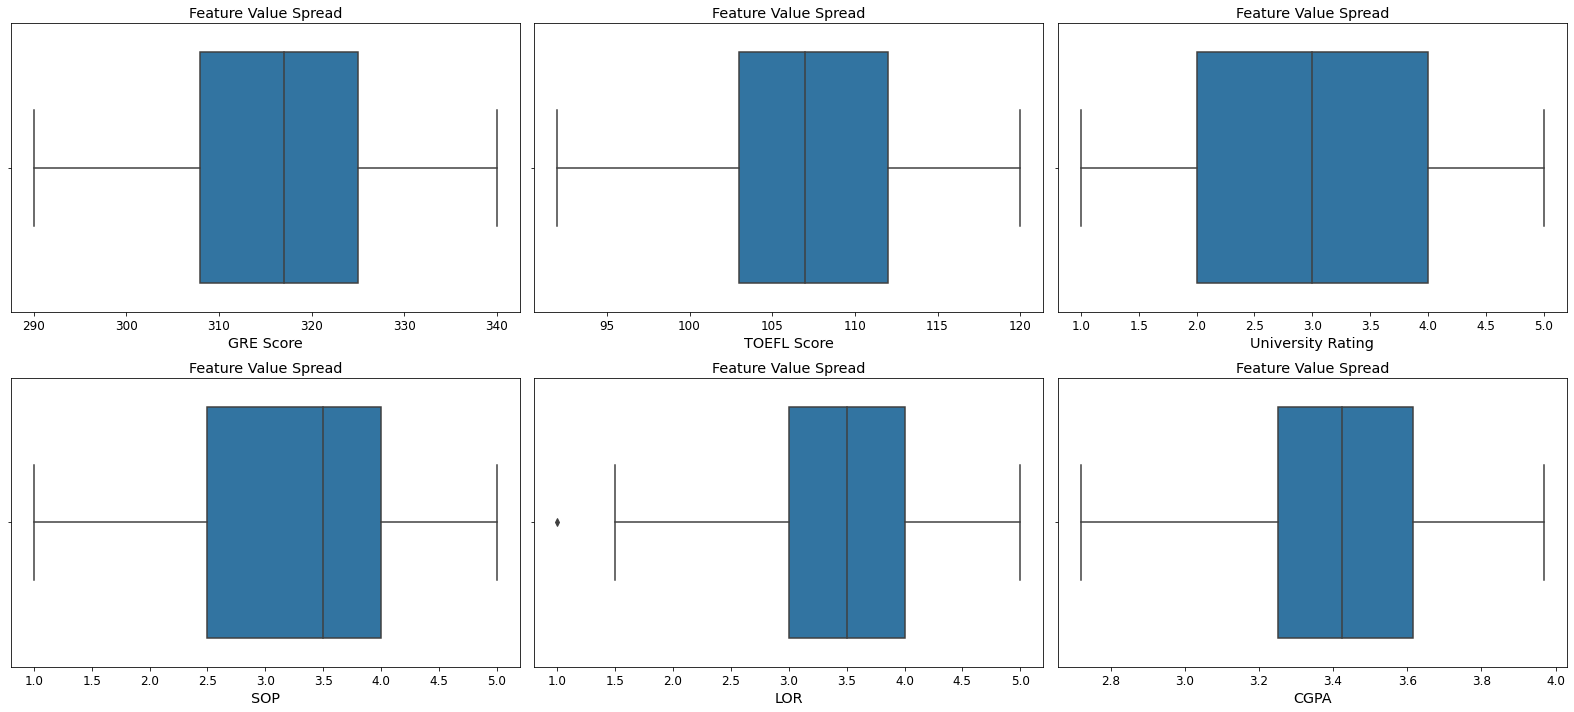

In [11]:
fig = plt.figure(figsize=(22, 10))

params = get_plt_params()
plt.rcParams.update(params)
    
fig.subplots_adjust(hspace=1, wspace=.5)


for i in range(len(columns)-1):
    plt.subplot(2, 3, i+1)
    plt.title("Distribution/ Spread")
    val = df2[columns[i]]
    ax = sns.boxplot(x=val)
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)
    ax.set_title('Feature Value Spread')

plt.tight_layout() 

In [12]:
print("\n")
for i in range(len(columns)-1):
    print(" " + "*"*50)
    val = df2[columns[i]]
    print(" " + columns[i])
    print(" " + "*"*50)
    print(" Minimum                        :{:.2f}".format(val.min()))
    print(" Maximum                        :{:.2f}".format(val.max()))
    print(" Percentile(25%)                :{:.2f}".format(val.quantile(0.25)))
    print(" Percentile(75%)                :{:.2f}".format(val.quantile(0.75)))
    print(" Percentile(50%)/ Median        :{:.2f}".format(val.quantile(0.55)))
    print(" Mean                           :{:.2f}".format(val.mean()))
    print(" Standard Deviation             :{:.2f}".format(val.std()))
    print(" " + "-"*50)
    print("\n")



 **************************************************
 GRE Score
 **************************************************
 Minimum                        :290.00
 Maximum                        :340.00
 Percentile(25%)                :308.00
 Percentile(75%)                :325.00
 Percentile(50%)/ Median        :318.45
 Mean                           :316.47
 Standard Deviation             :11.30
 --------------------------------------------------


 **************************************************
 TOEFL Score
 **************************************************
 Minimum                        :92.00
 Maximum                        :120.00
 Percentile(25%)                :103.00
 Percentile(75%)                :112.00
 Percentile(50%)/ Median        :108.00
 Mean                           :107.19
 Standard Deviation             :6.08
 --------------------------------------------------


 **************************************************
 University Rating
 ******************************

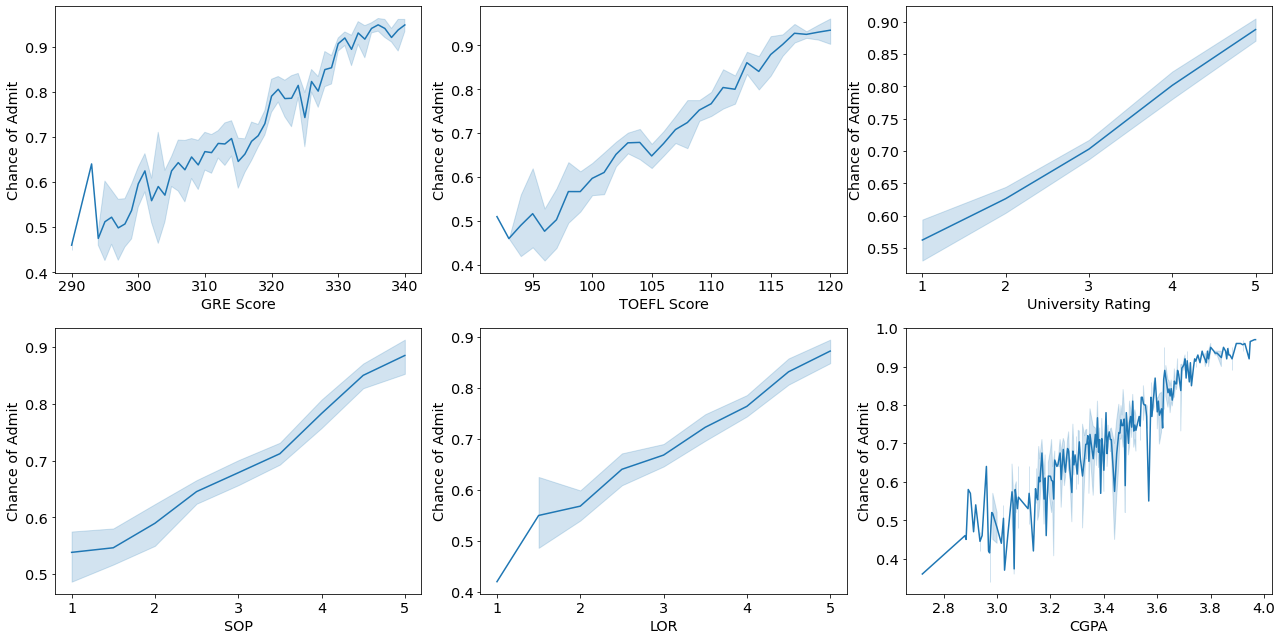

In [14]:
fig = plt.figure(figsize=(18, 9))

params = get_plt_params()
plt.rcParams.update(params)

fig.subplots_adjust(hspace=0.5)

for i in range(len(columns)-1):
    plt.subplot(2, 3, i+1)
    sns.lineplot(x=columns[i], y=target, data=df2)
plt.tight_layout()   
plt.plot();

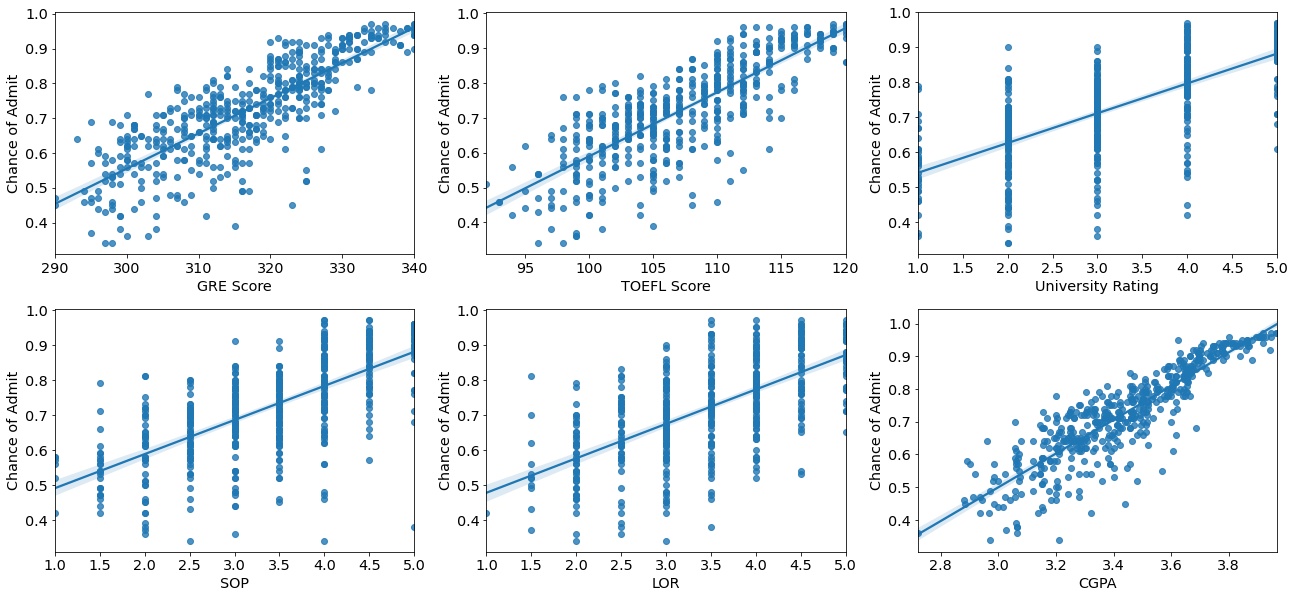

In [15]:
fig = plt.figure(figsize=(18, 12))
fig.subplots_adjust(hspace=0.6)

params = get_plt_params()
plt.rcParams.update(params)

for i in range(len(columns)-1):
    plt.subplot(3, 3, i+1)
    sns.regplot(x=columns[i], y=target, data=df2)
plt.tight_layout()   
plt.plot();

<Figure size 1296x864 with 0 Axes>

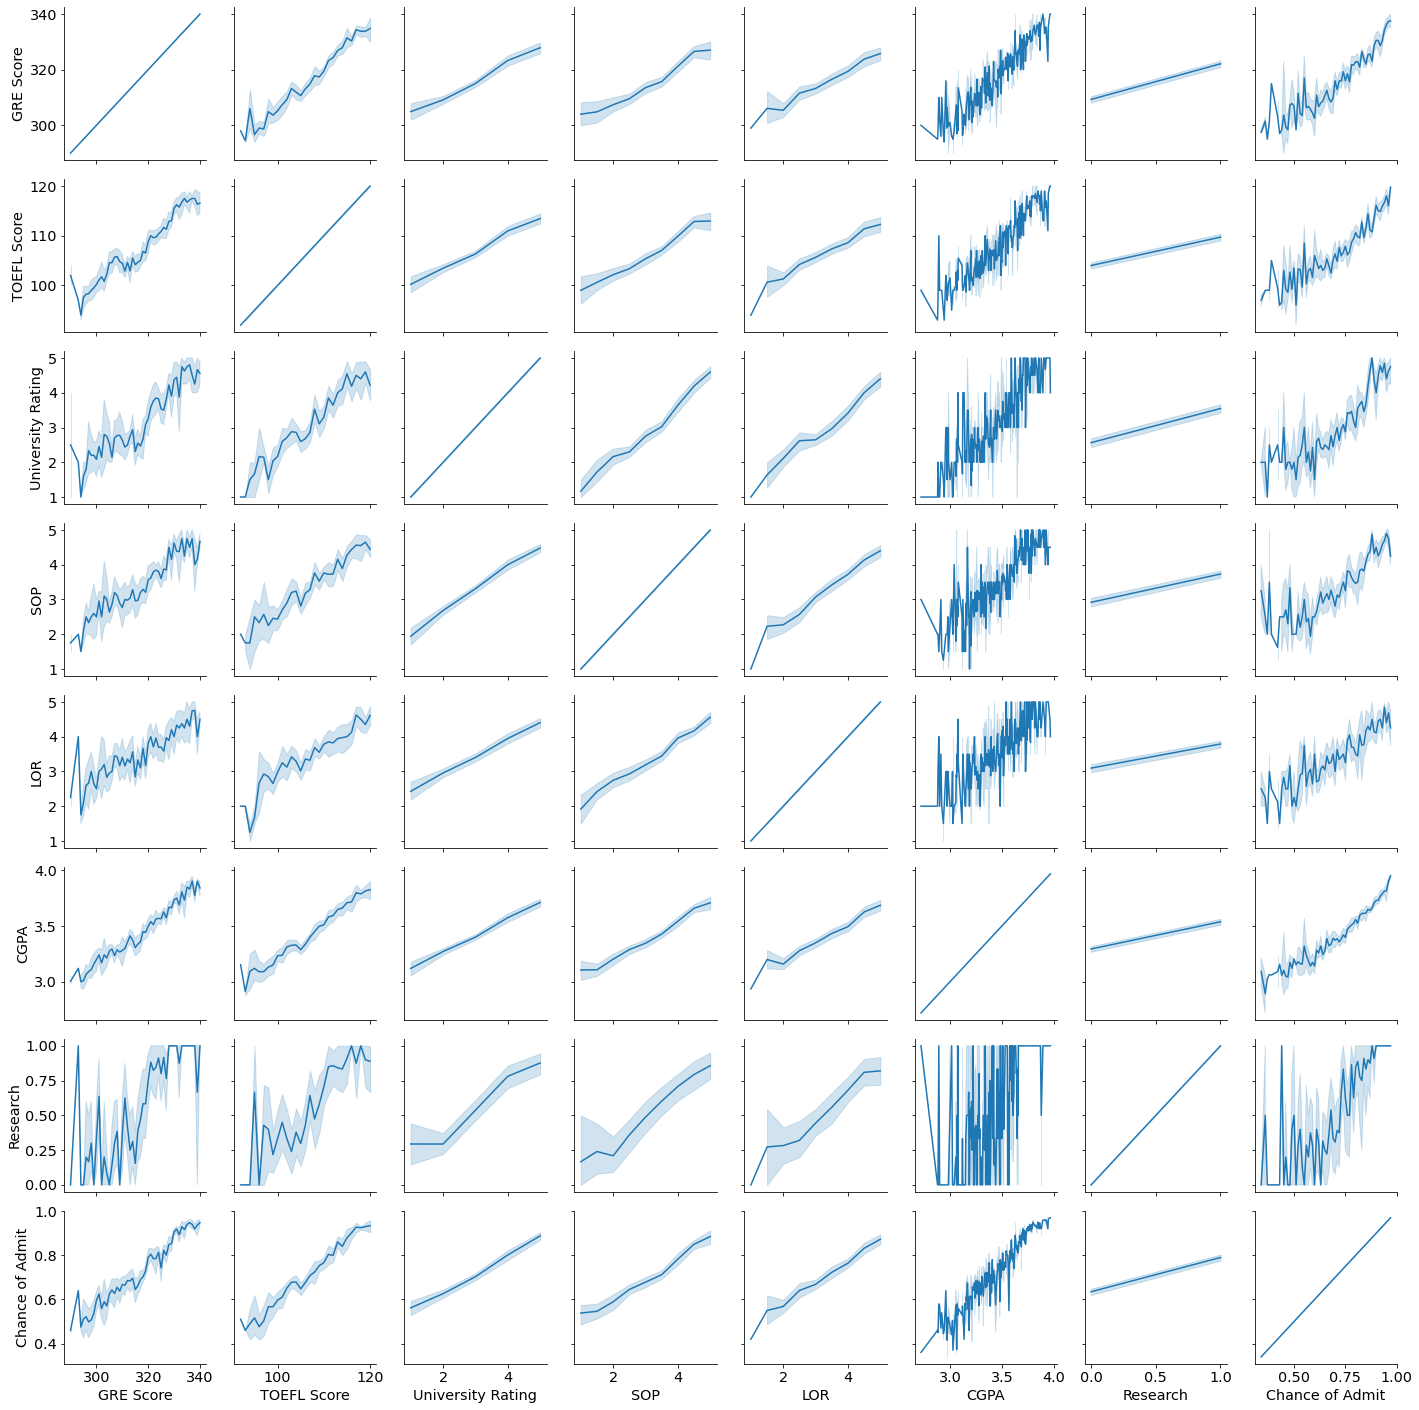

In [17]:
fig = plt.figure(figsize=(18, 12))

params = get_plt_params()
plt.rcParams.update(params)

g = sns.PairGrid(df2[all_columns])
g.map(sns.lineplot);

(array([0.5, 1.5, 2.5, 3.5, 4.5, 5.5, 6.5, 7.5]),
 [Text(0.5, 0, 'GRE Score'),
  Text(1.5, 0, 'TOEFL Score'),
  Text(2.5, 0, 'University Rating'),
  Text(3.5, 0, 'SOP'),
  Text(4.5, 0, 'LOR'),
  Text(5.5, 0, 'CGPA'),
  Text(6.5, 0, 'Research'),
  Text(7.5, 0, 'Chance of Admit')])

<Figure size 1296x864 with 0 Axes>

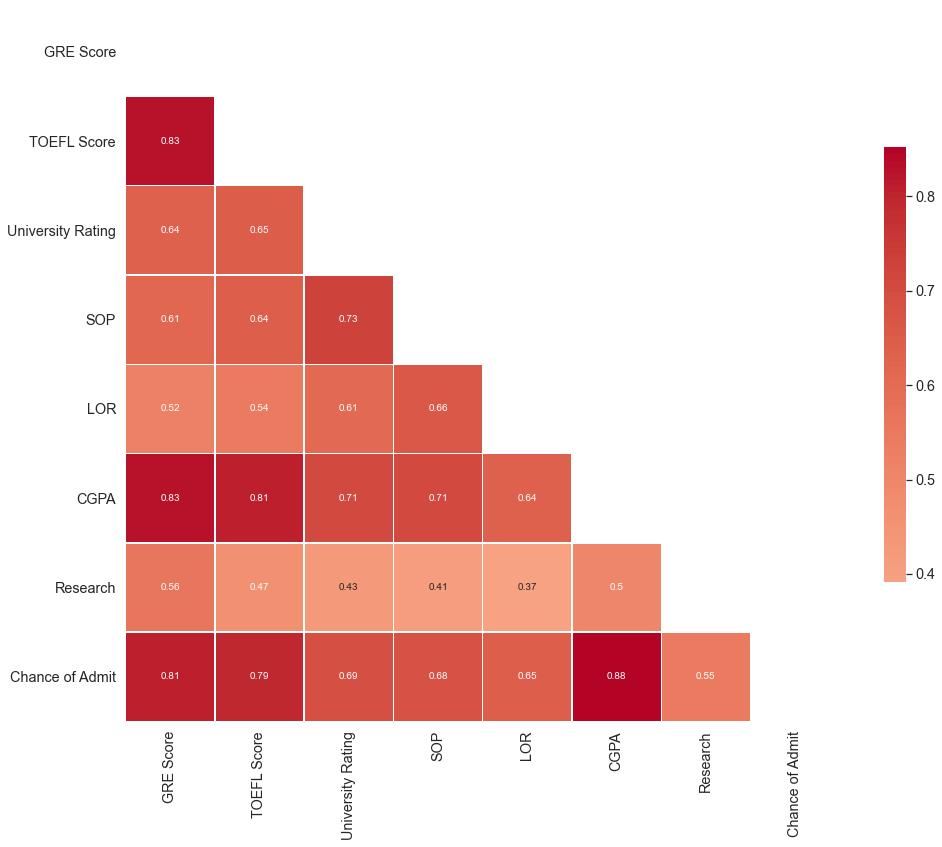

In [19]:
sns.set(style="white")
fig = plt.figure(figsize=(18, 12))

d = df2[all_columns]

params = get_plt_params()
plt.rcParams.update(params)


corr = d.corr()

mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

f, ax = plt.subplots(figsize=(len(all_columns)*2, len(all_columns)*2))

ax = sns.heatmap(
    corr,
    cmap='coolwarm',
    center=0,
    robust=True,
    annot=True,
    linewidths=0.5,
    linecolor='white',
    cbar=True,
    cbar_kws={"shrink": .5},
    square=True,
    mask=mask)

plt.yticks(rotation=0)
plt.xticks(rotation=90)

In [20]:
def print_performance(model, X_test, y_test):
    preds = model.predict(X_test)

    explained_variance_score = metrics.explained_variance_score(y_test, preds)
    mean_absolute_error = metrics.mean_absolute_error(y_test, preds)
    mean_squared_log_error = metrics.mean_squared_log_error(y_test, preds)
    median_absolute_error = metrics.median_absolute_error(y_test, preds)
    r2_score = metrics.r2_score(y_test, preds)

    print(" " + "-"*55)
    print(" Performance")
    print(" " + "-"*55)
    print(" {} : {:.4f} ".format("Explained Variance Score ", explained_variance_score))
    print(" {} : {:.4f} ".format("Mean Absolute Error      ", mean_absolute_error))
    print(" {} : {:.4f} ".format("Mean Squared Error       ", mean_squared_log_error))
    print(" {} : {:.4f} ".format("Median Squared Error     ", median_absolute_error))
    print(" {} : {:.4f} ".format("R2 Score                 ", r2_score))
    print(" " + "-"*55)
    print("\n\n")
    
    return preds

In [22]:
X = df2[columns].values
y = df2[target].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

scaler = preprocessing.MinMaxScaler()
scaler = scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

Training

 Model Score: 79.73%

 -------------------------------------------------------
 Performance
 -------------------------------------------------------
 Explained Variance Score  : 0.7982 
 Mean Absolute Error       : 0.0460 
 Mean Squared Error        : 0.0015 
 Median Squared Error      : 0.0364 
 R2 Score                  : 0.7973 
 -------------------------------------------------------



Mean difference in prediction  : 0.0041
Median difference in prediction: 0.0158


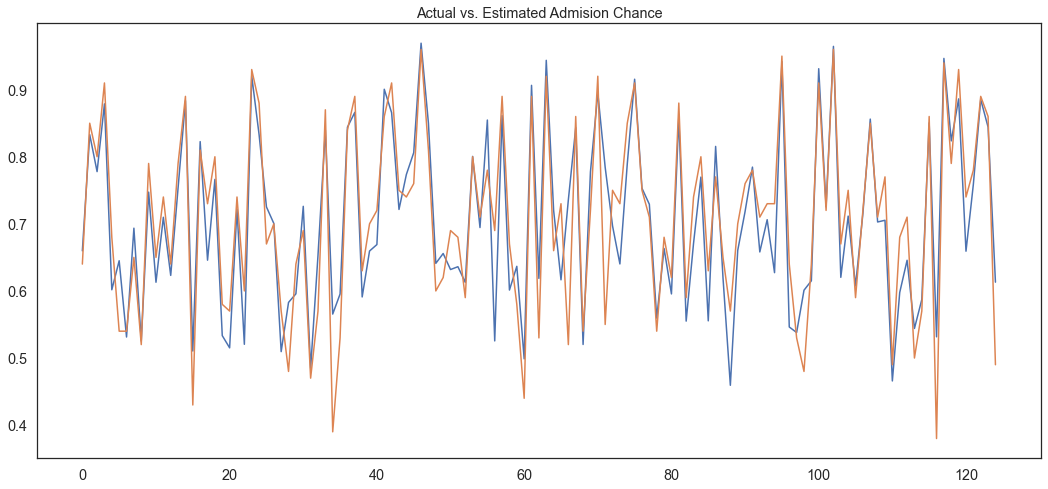

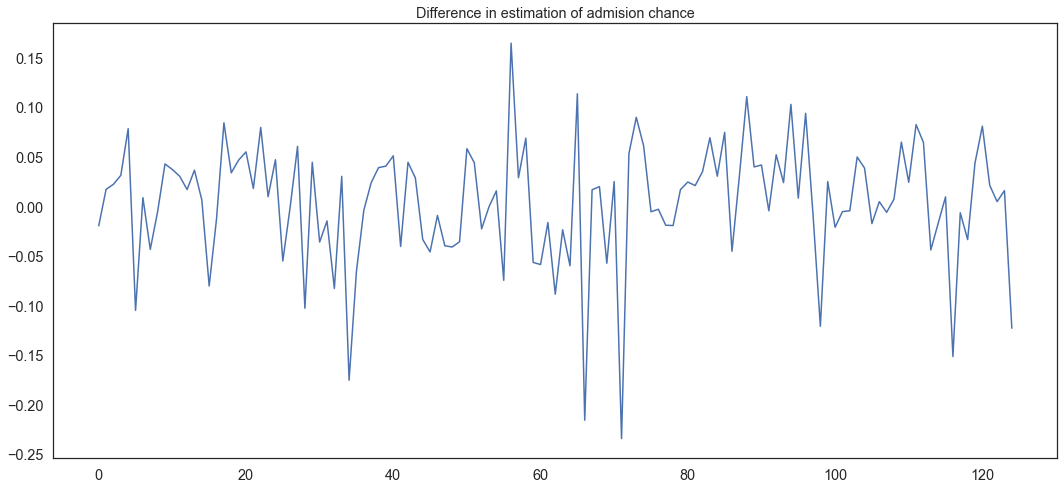


 Model Score: 74.98%

 -------------------------------------------------------
 Performance
 -------------------------------------------------------
 Explained Variance Score  : 0.7989 
 Mean Absolute Error       : 0.0572 
 Mean Squared Error        : 0.0018 
 Median Squared Error      : 0.0520 
 R2 Score                  : 0.7498 
 -------------------------------------------------------



Mean difference in prediction  : 0.0304
Median difference in prediction: 0.0427


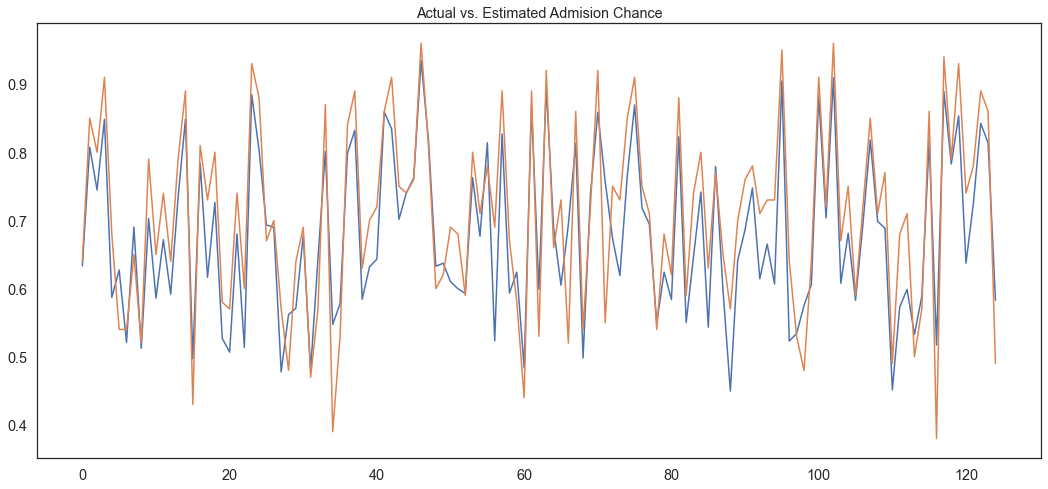

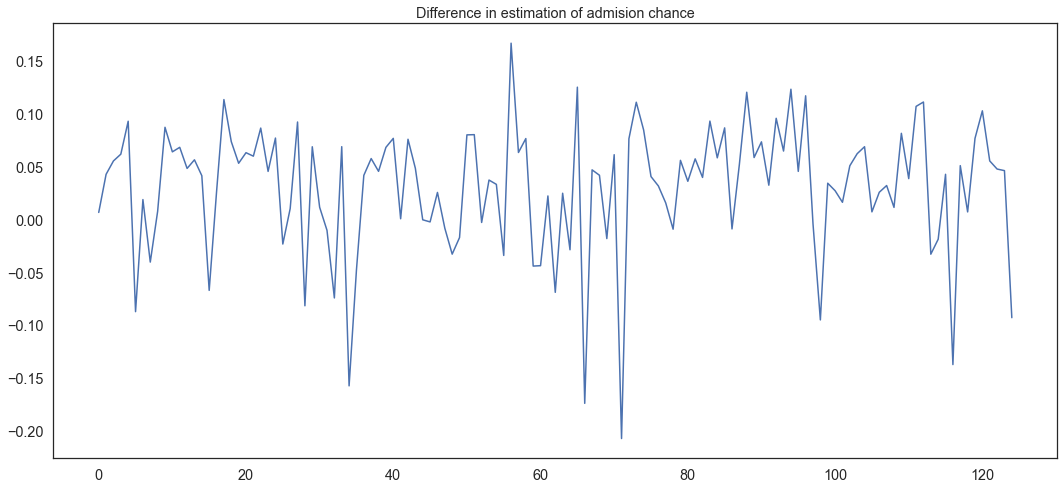


 Model Score: 79.46%

 -------------------------------------------------------
 Performance
 -------------------------------------------------------
 Explained Variance Score  : 0.7953 
 Mean Absolute Error       : 0.0462 
 Mean Squared Error        : 0.0015 
 Median Squared Error      : 0.0359 
 R2 Score                  : 0.7946 
 -------------------------------------------------------



Mean difference in prediction  : 0.0036
Median difference in prediction: 0.0139


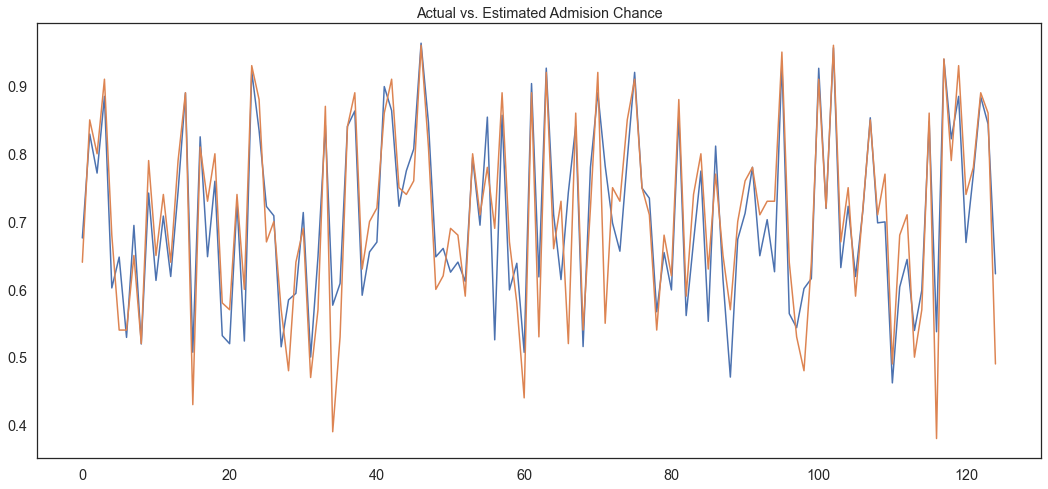

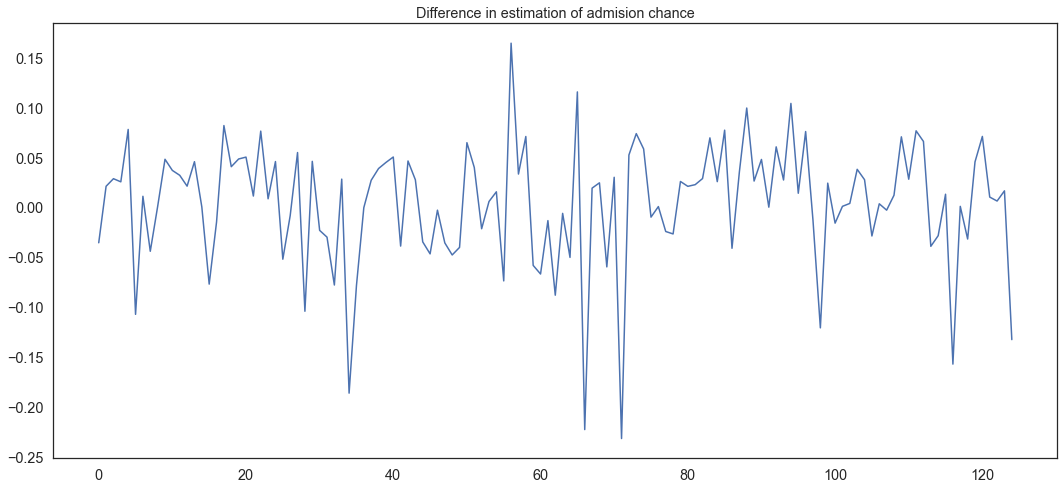


 Model Score: 79.70%

 -------------------------------------------------------
 Performance
 -------------------------------------------------------
 Explained Variance Score  : 0.7979 
 Mean Absolute Error       : 0.0460 
 Mean Squared Error        : 0.0015 
 Median Squared Error      : 0.0364 
 R2 Score                  : 0.7970 
 -------------------------------------------------------



Mean difference in prediction  : 0.0042
Median difference in prediction: 0.0155


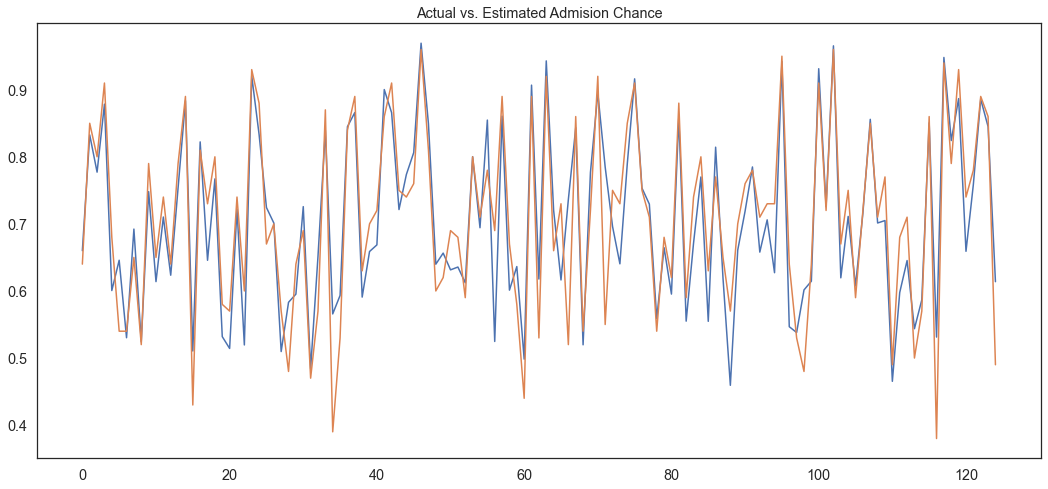

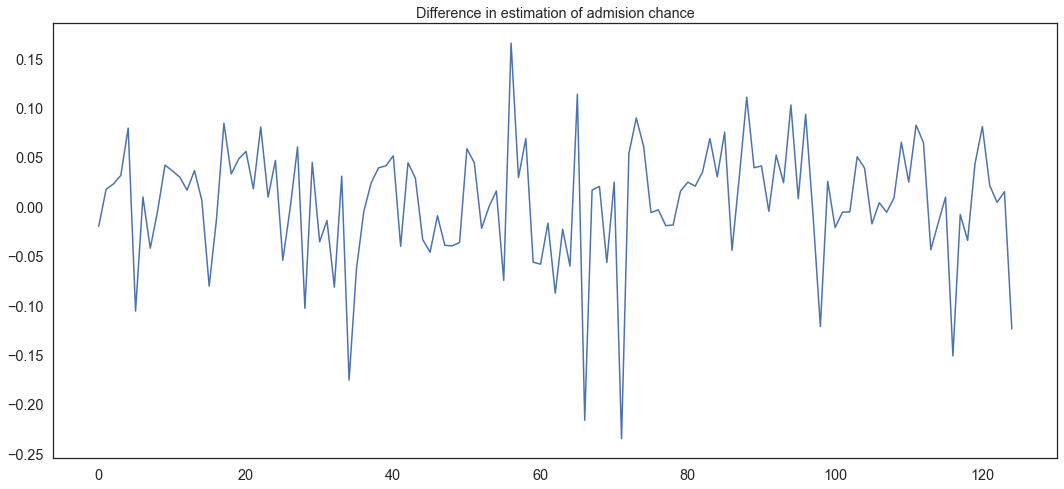

In [24]:
print("Training")
model_0 = LinearRegression(normalize=True)
model_1 = svm.SVR(kernel='linear')
model_2 = linear_model.Ridge()
model_3 = BaggingRegressor(model_0, n_estimators=100)

for model in [model_0, model_1, model_2, model_3]:
    
    model.fit(X_train, y_train)
    print("\n Model Score: {:.2f}%\n".format(model.score(X_test, y_test)*100))
    
    preds = print_performance(model, X_test, y_test)
    diff = y_test-preds
    
    print("Mean difference in prediction  : {:0.4f}".format(diff.mean()))
    print("Median difference in prediction: {:0.4f}".format(median(diff)))
    
    sns.lineplot(data=preds)
    sns.lineplot(data=y_test)
    plt.title("Actual vs. Estimated Admision Chance")
    plt.show()
    sns.lineplot(data=diff)
    plt.title("Difference in estimation of admision chance")
    plt.show()

In [26]:
GRE_Score = 313
TOEFL_Score = 102
University_Rating = 5
SOP = 3
LOR = 3
CGPA = 3.80
Research = 1

sample1 = [GRE_Score, TOEFL_Score, University_Rating, SOP, LOR, CGPA, Research]
sample1 = np.array(sample1).reshape(1, -1)

sample1 = scaler.transform(sample1)

probab = model_3.predict(sample1)
print("Chance of admission: {:.2f}%".format(probab[0]*100))

Chance of admission: 81.64%
